In [4]:
from tidynamics import msd, acf

from scipy.optimize import curve_fit

import numpy as np

import h5py

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['xtick.labelsize']=20
matplotlib.rcParams['ytick.labelsize']=20
matplotlib.rcParams['font.size']=25
matplotlib.rcParams['legend.fontsize']=20
matplotlib.rcParams['axes.labelsize']=20
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']
matplotlib.rc('text',usetex=True)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  app.launch_new_instance()


In [5]:
data1_x = np.load('diffcoeff_osc_x_50617507.npy')
data2_x = np.load('diffcoeff_osc_x_50620357.npy')
data3_x = np.load('diffcoeff_osc_x_50623020.npy')

data1_z = np.load('diffcoeff_osc_z_50617507.npy')
data2_z = np.load('diffcoeff_osc_z_50620357.npy')
data3_z = np.load('diffcoeff_osc_z_50623020.npy')

In [6]:
D_z = np.concatenate((data1_z, data2_z, data3_z))

D_mean = D_z.mean()
D_std = D_z.std()

print(D_mean, D_std)
#print(D_z)

D_x = np.stack((data1_x, data2_x, data3_x))
#print(D_x)

D_x_mean = np.mean(D_x, axis=0)
D_x_std = np.std(D_x, axis=0)

print(D_x_mean, D_x_std)

0.6112692171084909 0.009684788235209213
[0.5977235  0.59846233 0.59855973 0.59882938 0.59868042 0.59925331
 0.59948188 0.60063726 0.6007587  0.60187475 0.60845532 0.60917144
 0.60936158 0.60965416 0.60953695 0.61034849 0.61086779 0.61071913
 0.61118968 0.6118168  0.61741958 0.61862838 0.61939728 0.61898666
 0.61879079 0.61807454 0.61680762 0.61802301 0.61803548 0.61705832
 0.62111158 0.62384912 0.62563372 0.62534718 0.6217629  0.61931524
 0.62277117 0.62576374 0.62624086 0.62173271 0.63509927 0.64650553
 0.66752046 0.66633395 0.64592716 0.63375178 0.64916367 0.67175677
 0.67127768 0.64936172 0.68479498 0.71207356 0.75455934 0.75550916
 0.71256686 0.68609175 0.70913052 0.75062658 0.75085721 0.71034677
 0.69953594 0.7511674  0.83658804 0.83744168 0.75264889 0.70161545
 0.75509494 0.84022262 0.84138818 0.75631437 1.09551586 1.30532514
 1.64757606 1.65049442 1.31372842 1.10906409 1.32643237 1.67326096
 1.67734857 1.34026774] [5.12448195e-03 4.51061794e-03 3.94732076e-03 4.97041852e-03
 5.0

0
1
2
3
4
5
6
7


<Figure size 432x288 with 0 Axes>

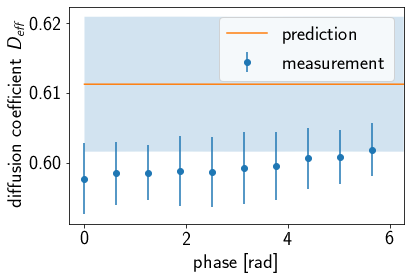

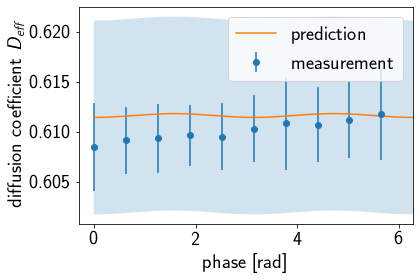

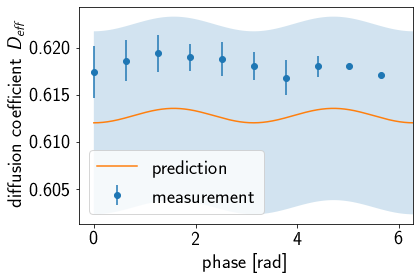

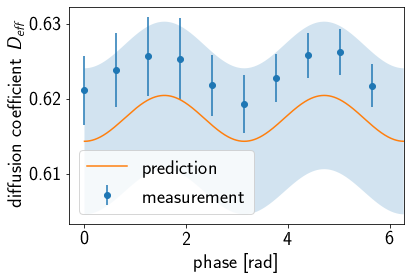

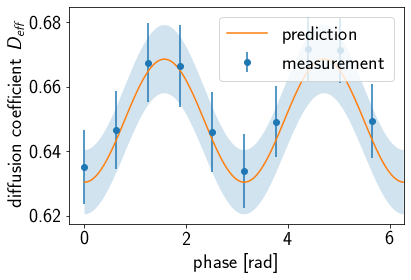

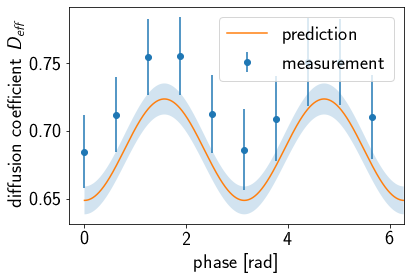

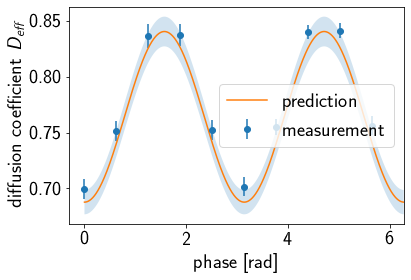

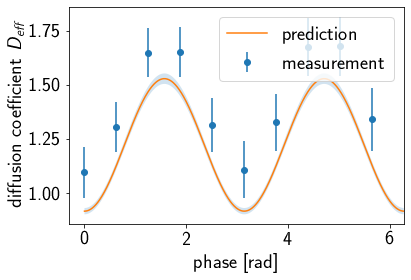

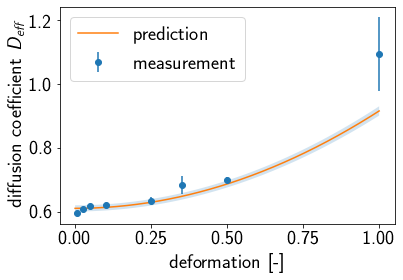

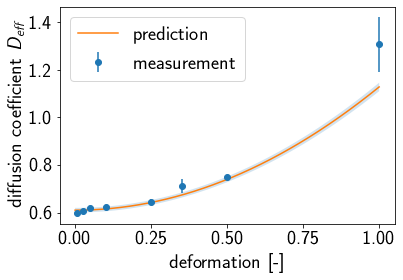

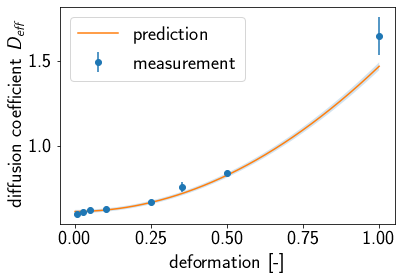

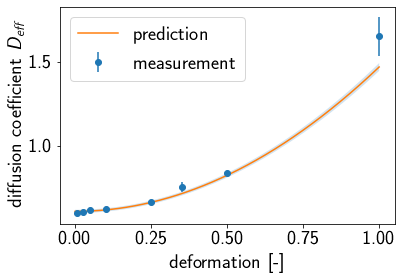

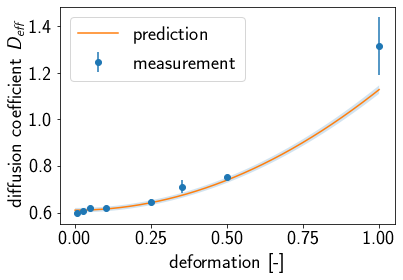

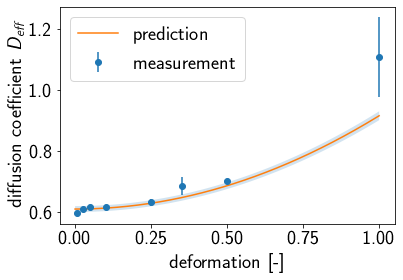

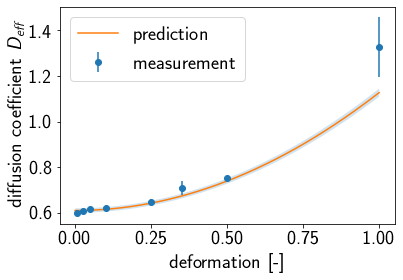

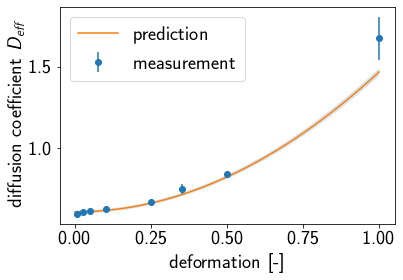

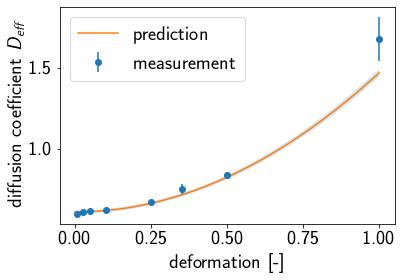

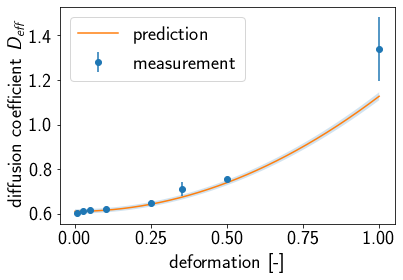

In [7]:
#D_eff = D * (1. + strain**2. / 2. * (2. * np.sin(phase)**2. + 1.))

ppp = 10

phase = np.linspace(0, 2.0*np.pi, 11)[:-1]
strain = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0, 2.])
strain = strain / 2

phase_conti = np.linspace(0, 2.0*np.pi, 1000)[:-1]
strain_conti = np.linspace(0, 1, 1000)[:-1]

fig = plt.figure()

for i in range(8):
    print(i)
    fig, ax1 = plt.subplots()
    ax1.set_ylabel("diffusion coefficient $D_{eff}$")
    ax1.set_xlabel("phase [rad]")
    ax1.set_xlim(-0.3,2.*np.pi)
    ax1.errorbar(phase, D_x_mean[i*10:(i+1)*10], yerr=D_x_std[i*10:(i+1)*10], fmt='o', label = "measurement")
    ax1.plot(phase_conti, D_mean * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)), label = "prediction")
    ax1.fill_between(phase_conti, 
                     (D_mean-D_std) * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)), 
                     (D_mean+D_std) * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)),
                     alpha=0.2)
    ax1.legend()

for i in range(10):
    fig, ax1 = plt.subplots()
    ax1.set_ylabel("diffusion coefficient $D_{eff}$")
    ax1.set_xlabel("deformation [-]")
    ax1.errorbar(strain, D_x_mean[i::ppp], yerr=D_x_std[i::ppp], fmt='o', label = "measurement")
    #ax2 = ax1.twinx()
    ax1.plot(strain_conti, D_mean * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)), label = "prediction")
    ax1.fill_between(strain_conti,
                    (D_mean-D_std) * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)),
                    (D_mean+D_std) * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)),
                    alpha=0.2)
    ax1.legend()

4
6


<Figure size 432x288 with 0 Axes>

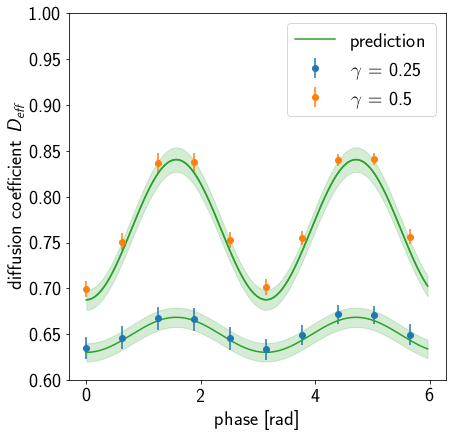

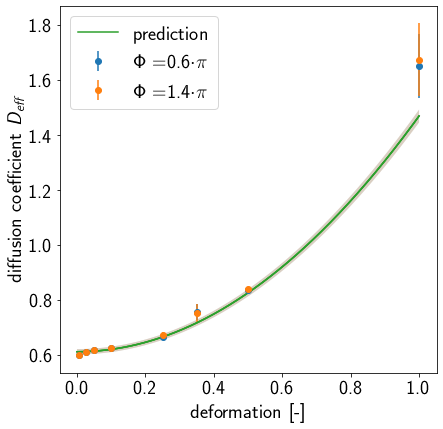

In [8]:
#D_eff = D * (1. + strain**2. / 2. * (2. * np.sin(phase)**2. + 1.))

ppp = 10

phase = np.linspace(0, 2.0*np.pi, 11)[:-1]
phase_legend = np.linspace(0, 2.0, 11)[:-1]
strain = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0, 2.])
strain = strain / 2

phase_conti = np.linspace(0, 1.9 *np.pi, 1000)[:-1]
strain_conti = np.linspace(0, 1, 1000)[:-1]

fig = plt.figure()

fig, ax1 = plt.subplots(figsize=(2*3.375,2*3.375))
for i in [4, 6]:
    print(i)
    ax1.set_ylabel("diffusion coefficient $D_{eff}$")
    ax1.set_xlabel("phase [rad]")
    ax1.set_xlim(-0.3,2.*np.pi)
    ax1.set_ylim(0.6,1.0)
    ax1.errorbar(phase, D_x_mean[i*10:(i+1)*10], yerr=D_x_std[i*10:(i+1)*10], fmt='o', label = "$\gamma$ = " + str(strain[i]))
    ax1.plot(phase_conti, D_mean * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)), color='tab:green')
    ax1.fill_between(phase_conti, 
                     (D_mean-D_std) * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)), 
                     (D_mean+D_std) * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)),
                     color='tab:green', alpha=0.2)

ax1.plot(phase_conti, D_mean * (1. + strain[i]**2. / 2. * (2. * np.sin(phase_conti)**2. + 1.)), label = "prediction", color='tab:green')
ax1.legend()
#plt.savefig("osc_shear_phase.pdf")

fig, ax1 = plt.subplots(figsize=(2*3.375,2*3.375))
for i in [3, 7]:
    ax1.set_ylabel("diffusion coefficient $D_{eff}$")
    ax1.set_xlabel("deformation [-]")
    ax1.errorbar(strain, D_x_mean[i::ppp], yerr=D_x_std[i::ppp], fmt='o', label = "$\Phi =$" + "{:.1f}".format(phase_legend[i]) + "$\cdot \pi$")
    ax1.plot(strain_conti, D_mean * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)), color='tab:green')
    ax1.fill_between(strain_conti,
                    (D_mean-D_std) * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)),
                    (D_mean+D_std) * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)),
                    alpha=0.2)
ax1.plot(strain_conti, D_mean * (1. + strain_conti**2. / 2. * (2. * np.sin(phase[i])**2. + 1.)), label = "prediction", color='tab:green')
ax1.legend()
#plt.savefig("osc_shear_strain.pdf")